In [2]:
import pandas as pd
import quandl # has a bunch of datasets through quandl.com
import math, datetime
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import joblib # for saving pickles

In [3]:
df = quandl.get('WIKI/GOOGL')

In [4]:
df.head()
x = df.copy()

In [5]:
# Regression - Take in data and find best fit line
# y = mx + b, the point is to find m and b
# features and labels

# Ex. - pattern recognition with stock prices

# neural networks good for finding relationships between attributes, but with regression it's best to simplify and eliminate useless features


In [6]:
df = x

In [7]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']] # retaining desired attributes while eliminating all others

# creating normalized relationships. the specific formula doesn't matter as long as each feature wanted is involved because the scale is standardized since it is applied to entire dataset
df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low'] * 100
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/3487540991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_PCT'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Low'] * 100
/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/3487540991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100


In [8]:
forecast_col = 'Adj. Close'

df.fillna(-99999, inplace=True)

In [9]:
forecast_out = int(math.ceil(0.01*len(df)))

In [10]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [11]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


In [12]:


X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])

/var/folders/bl/nm33gwcs1xg4szyjqn1k3plm0000gn/T/ipykernel_19160/2498778821.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))


In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [14]:
clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.97659527450882


In [15]:
forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

[1101.3516995  1074.20480959 1019.68256698 1059.21775824 1075.09218037
 1075.80058456 1093.33719613 1112.02511227 1117.31321435 1124.62676219
 1134.48641647 1131.49803557 1150.21597753 1166.65964697 1137.97846655
 1124.52549033 1088.84432243 1103.58248708 1115.48362555 1123.6001878
 1136.42441618 1152.21681479 1182.6863185  1188.42067004 1158.85129831
 1171.37037359 1172.13951281 1155.28688424 1119.75032429 1116.58563698
 1115.22479803 1071.41562881 1043.7516681  1070.93666432 1019.95776781] 0.97659527450882 35


In [16]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400 # seconds
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

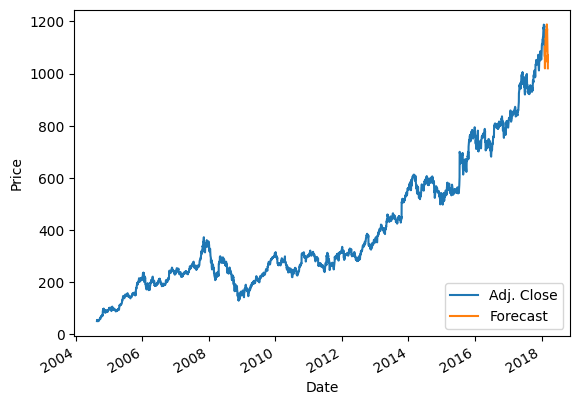

In [17]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
# Pickling - serialization of any object such as classifier
# Saves the training of an algorithm
# Helpful when there's a bunch of data involved

# to save smth and create file
joblib.dump(clf,'linearregreesion.pickle')

['linearregreesion.pickle']

In [19]:
# to load saved object from a existing file
clf = joblib.load('linearregreesion.pickle')